In [28]:
import os
import pandas as pd
import numpy as np

In [29]:
friday_pm_df = pd.read_csv('/Users/jessicawoo/Desktop/cs506/wfh/friday_pm.csv')
friday_end_df = pd.read_csv('/Users/jessicawoo/Desktop/cs506/wfh/friday_end.csv')

In [30]:
merged = friday_pm_df.merge(friday_end_df, on='mbl_cod', how='left')

In [31]:
prod16 = merged.groupby('DAILY_BREAKS')['PRODUCTIVITY_16'].mean()
prod17 = merged.groupby('DAILY_BREAKS')['PRODUCTIVITY_17'].mean()
prod18 = merged.groupby('DAILY_BREAKS')['PRODUCTIVITY_18'].mean()
prod19 = merged.groupby('DAILY_BREAKS')['PRODUCTIVITY_19'].mean()
prod20 = merged.groupby('DAILY_BREAKS')['PRODUCTIVITY_20'].mean()
prod21 = merged.groupby('DAILY_BREAKS')['PRODUCTIVITY_21'].mean()

all_prod = pd.concat([prod16, prod17, prod18, prod19, prod20, prod21], axis=1)

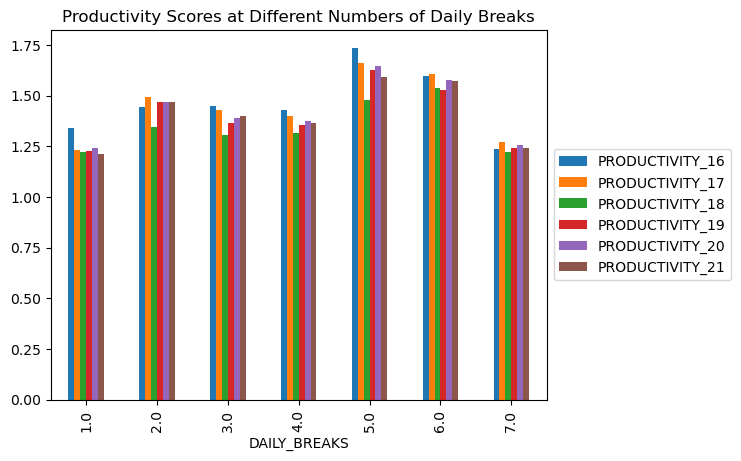

In [32]:
f = plt.figure()

plt.title('Productivity Scores at Different Numbers of Daily Breaks', color='black')
all_prod.plot(kind='bar', ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [39]:
friday_am_df = pd.read_csv('/Users/jessicawoo/Desktop/cs506/wfh/6month_friday_am.csv')

In [40]:
def get_month(st):
  st = str(st)
  return int(st.split()[0].split('-')[1])

In [41]:
friday_am_df['local_time'] = friday_am_df['local_time'].apply(get_month)

In [42]:
filtered_1month = friday_am_df.loc[friday_am_df['local_time'] == 5]
filtered_6month = friday_am_df.loc[friday_am_df['local_time'] == 10]

In [43]:
merged_1month = filtered_1month.merge(friday_end_df, on='mbl_cod', how='left')
merged_6month = filtered_6month.merge(friday_end_df, on='mbl_cod', how='left')

In [44]:
month1 = merged_1month.groupby('DAILY_BREAKS')['DISCOMFORT_SLIDER'].mean()

In [45]:
month6 = merged_6month.groupby('DAILY_BREAKS')['DISCOMFORT_SLIDER'].mean()

In [46]:
from matplotlib import pyplot as plt

month1_6 = pd.DataFrame({'First month': month1, 'Sixth month': month6})
month1 = pd.DataFrame(month1)
month6 = pd.DataFrame(month6)


<AxesSubplot:xlabel='Daily Breaks', ylabel='Average Discomfort Level'>

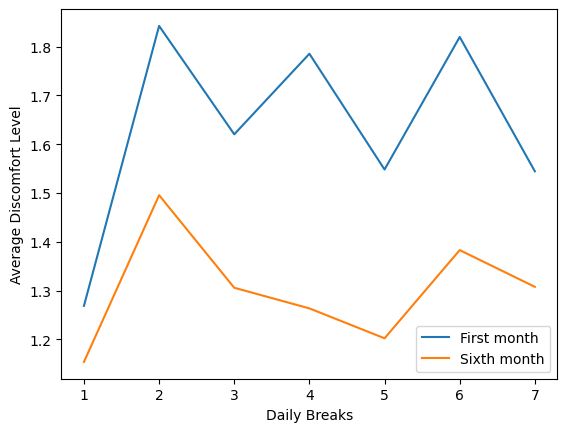

In [47]:
month1_6.plot(xlabel='Daily Breaks', ylabel='Average Discomfort Level')